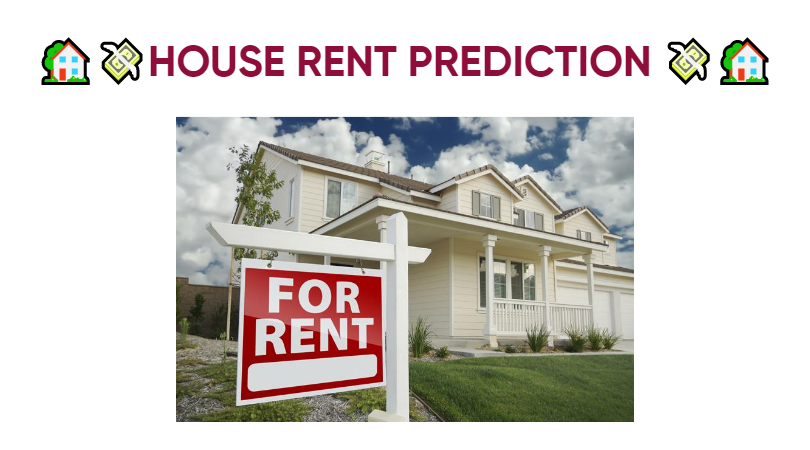

# Context
<p>Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.</p>

<p>Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.</p>

# Content
<p>In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.</p>

# Dataset Glossary (Column-Wise)

- **BHK:** Number of Bedrooms, Hall, Kitchen.
- **Rent:** Price of the Houses/Apartments/Flats.
- **Size:** Size of the Houses/Apartments/Flats in Square Feet.
- **Floor:** Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type:** Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality:** Locality of the Houses/Apartments/Flats.
- **City:** City where the Houses/Apartments/Flats are Located.
- **Furnishing Status:** Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred:** Type of Tenant Preferred by the Owner or Agent.
- **Bathroom:** Number of Bathrooms.
- **Point of Contact:** Whom should you contact for more information regarding the Houses/Apartments/Flats.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
rent_data = pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
rent_data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Observations:
- There is no null value for any column in the dataset.

## Descriptive Statistics

In [5]:
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# Data Analysis and Visualization

## Pairplot of data

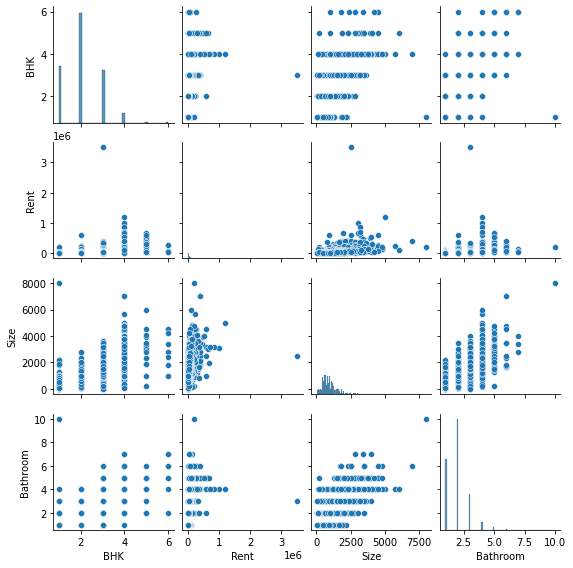

In [6]:
sns.pairplot(rent_data,height=2)
plt.show()

## Univariate Analysis

### Rent (Our Target Variable)

In [7]:
fig = px.histogram(rent_data,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

#### Observations:
- There is one outlier so far out of the inter-quantile range.

#### Actions:
- To remove outlier, as it may affect our assumptions about other variables and analysis

### Checking the position of Outlier

In [8]:
print(np.where(rent_data['Rent']>2000000))

(array([1837]),)


#### Observations:
- Outlier's position is at 1837th position in a dataframe.

### Deleting the Outlier

In [9]:
rent_data.drop([1837], axis=0, inplace=True)

fig = px.box(rent_data, x="Rent",title='Boxplot for Rent Prices')
fig.show()

### BHK

In [10]:
rent_data['BHK'].value_counts()

2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: BHK, dtype: int64

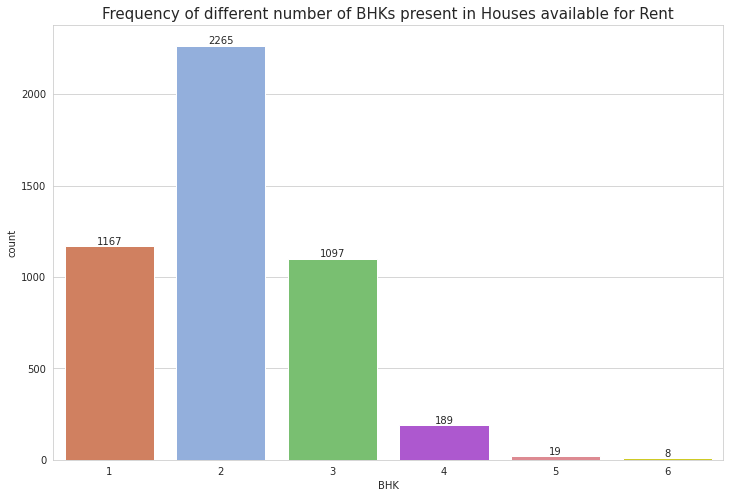

In [11]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='BHK',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mostly 2 BHK house are rented the most, as it is mostly under budget for the people and can be rented soon.
- 5 and 6 BHK house are put less for rent, because there is very less demand for such big spacious houses in India. 

### Bathroom

In [12]:
rent_data['Bathroom'].value_counts()

2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

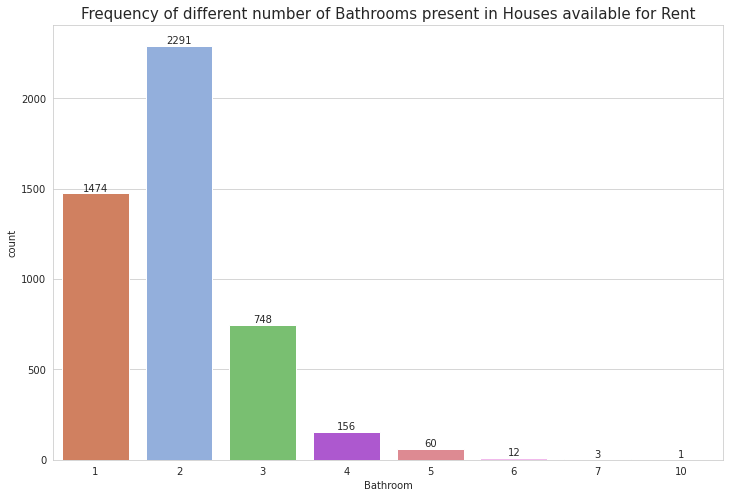

In [13]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='Bathroom', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- House with 2 Bathrooms are most common for the houses put up on rent.
- Houses with 7 and 10 bathroom quite seems inappropriate and not much of use.

### City

In [14]:
rent_data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

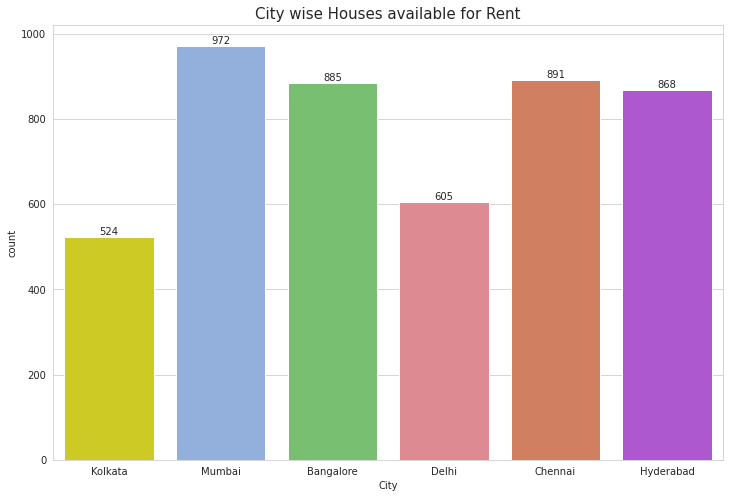

In [15]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=rent_data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mumbai, followed by Chennai and Hyderad has most number of rented houses, seems like there is very high demand considering the job corporates and other factors.

### Area Type

In [16]:
rent_data['Area Type'].value_counts()

Super Area     2446
Carpet Area    2297
Built Area        2
Name: Area Type, dtype: int64

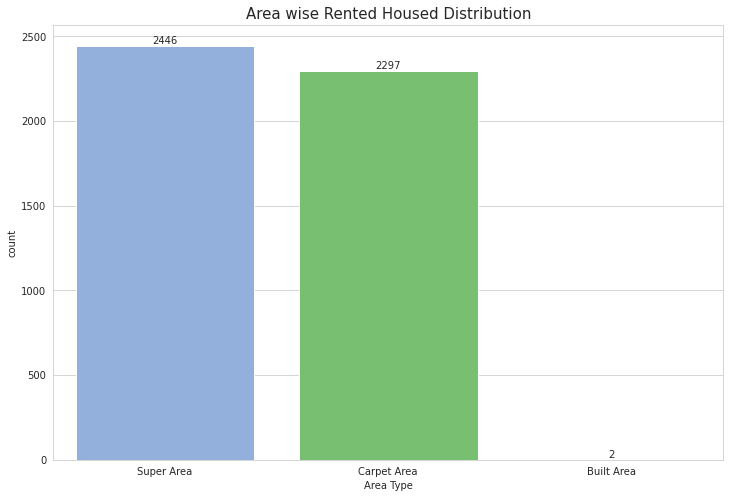

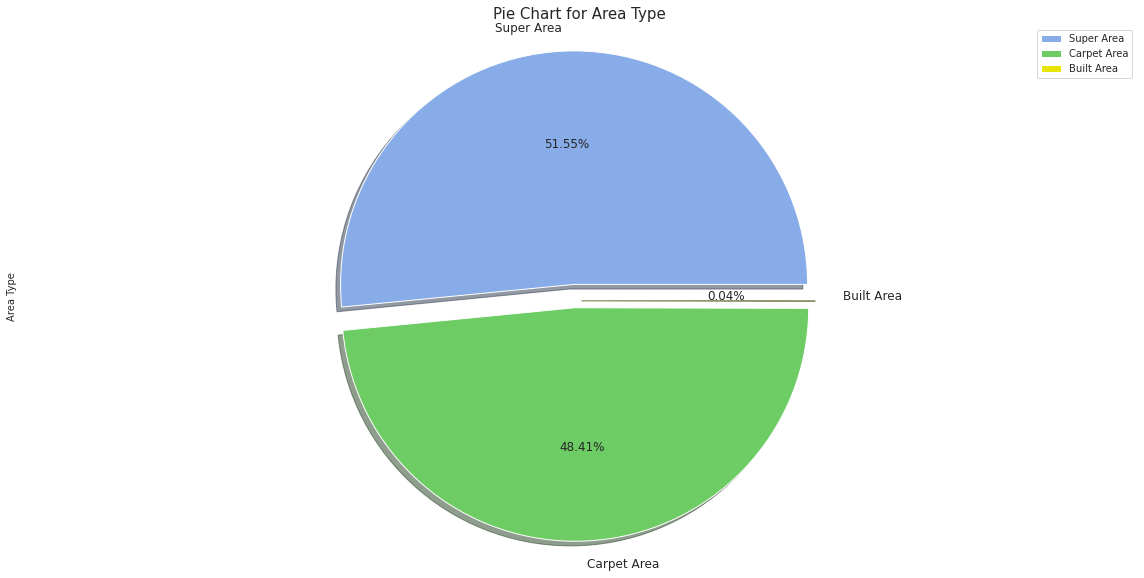

In [17]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()


#### Observations:
- Super area houses are more put up on rent.
- Built Area wise rented houses are very less.

### Point of Contact

In [18]:
rent_data['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: Point of Contact, dtype: int64

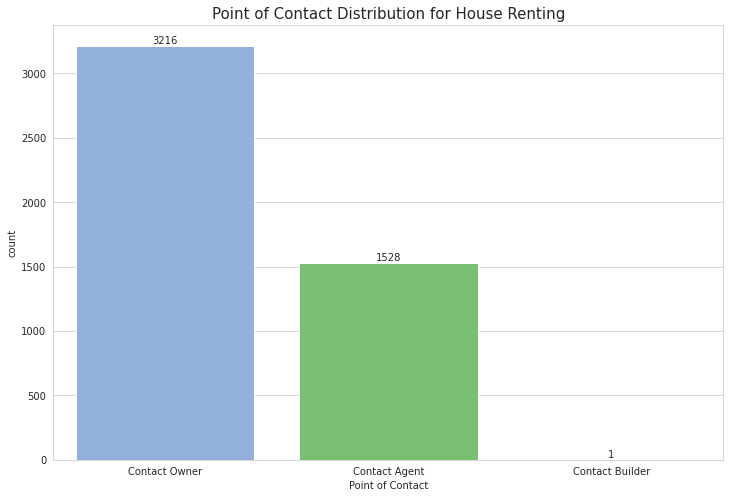

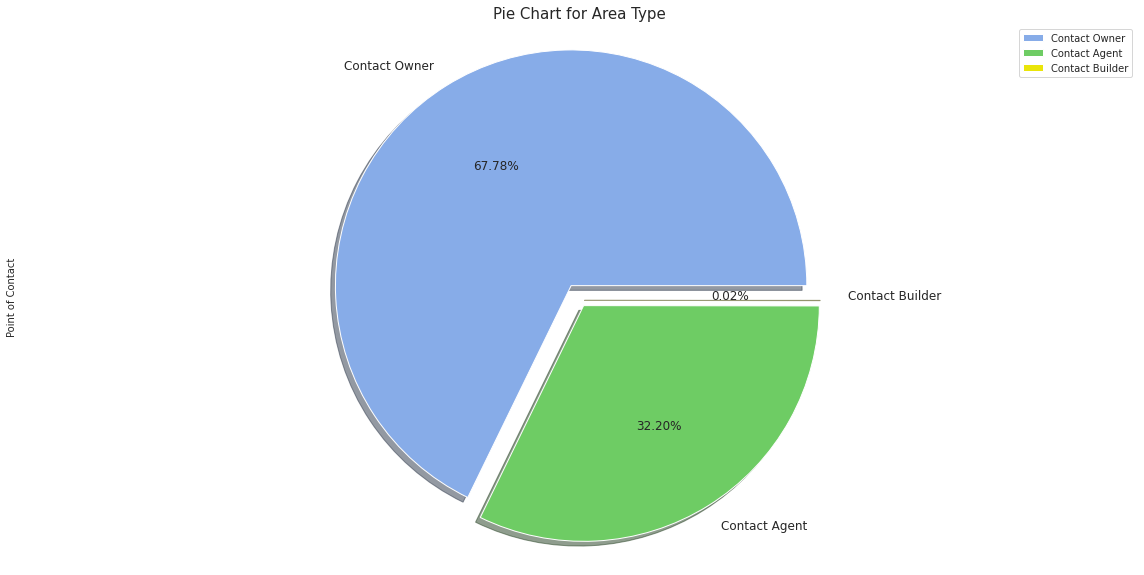

In [19]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Contact wise most have put the contact of owner only, as it directly more helps with negotiation and verification.

### Tenant Preferred

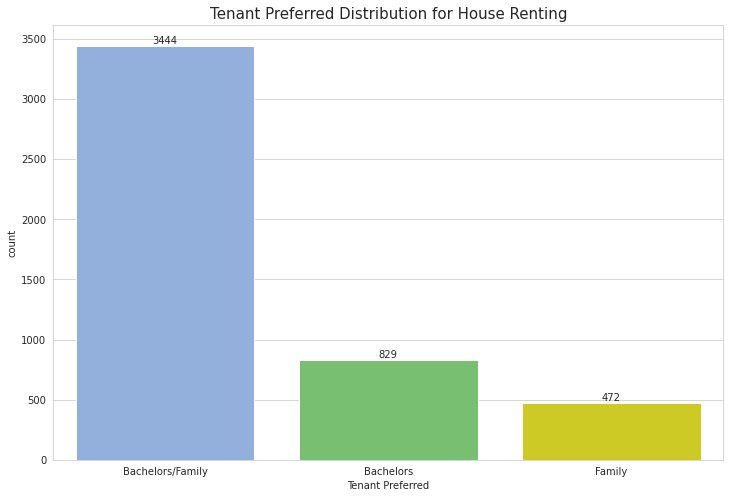

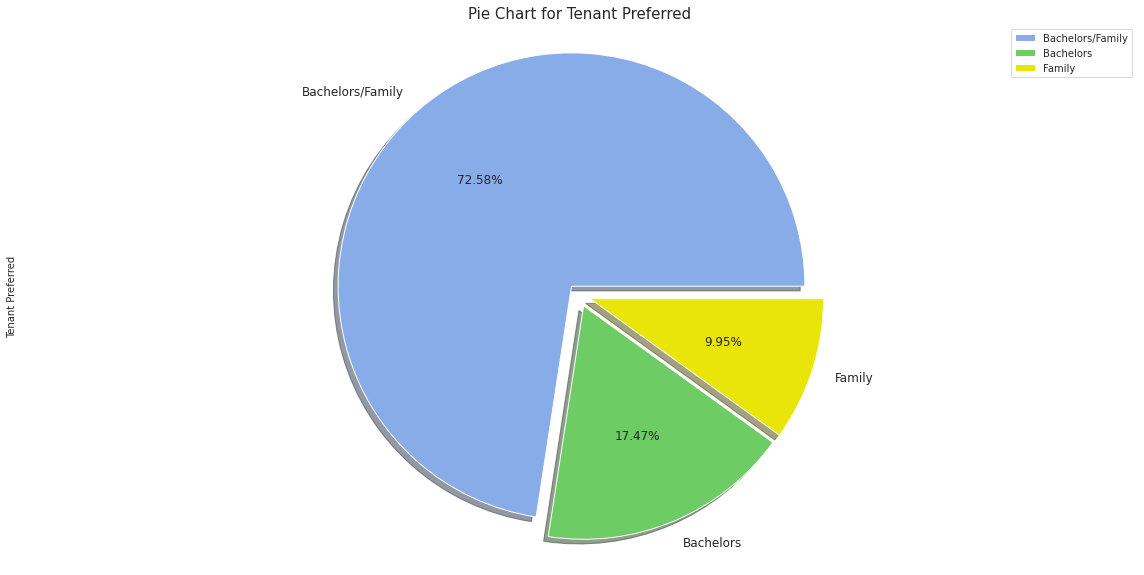

In [20]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- It seems most rented houses have no special category. They are okay with both Bachelors and Family.

### Furnishing Status

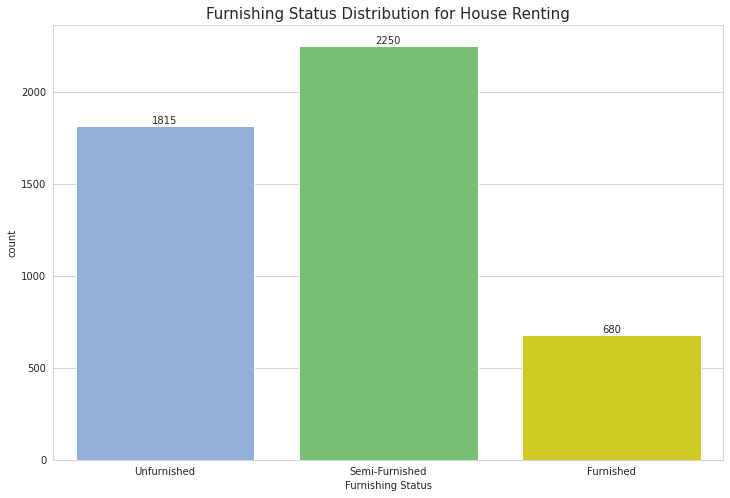

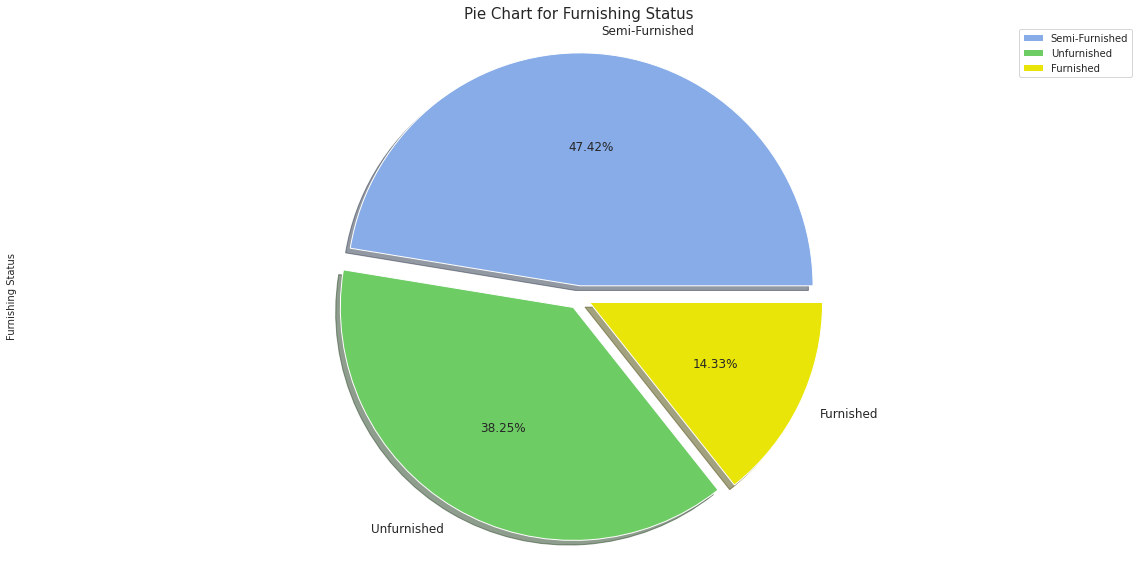

In [21]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Most Rented Houses are semi-furnished.
- Also cost wise these houses will be quite good to stay and pocket friendly.

## Size

In [22]:
fig = px.histogram(rent_data, x="Size", title='Size Distribution')
fig.show()
fig = px.box(rent_data, x="Size", title='Boxplot for Size')
fig.show()

#### Observations:
- The smallest house rented has size of about 10 sq. feet.
- The biggest house rented has size of about 8000 sq. feet.
- The median of house rented has size of about 850 sq. feet.

## Bivariate Analysis

### BHK and Rent distribution

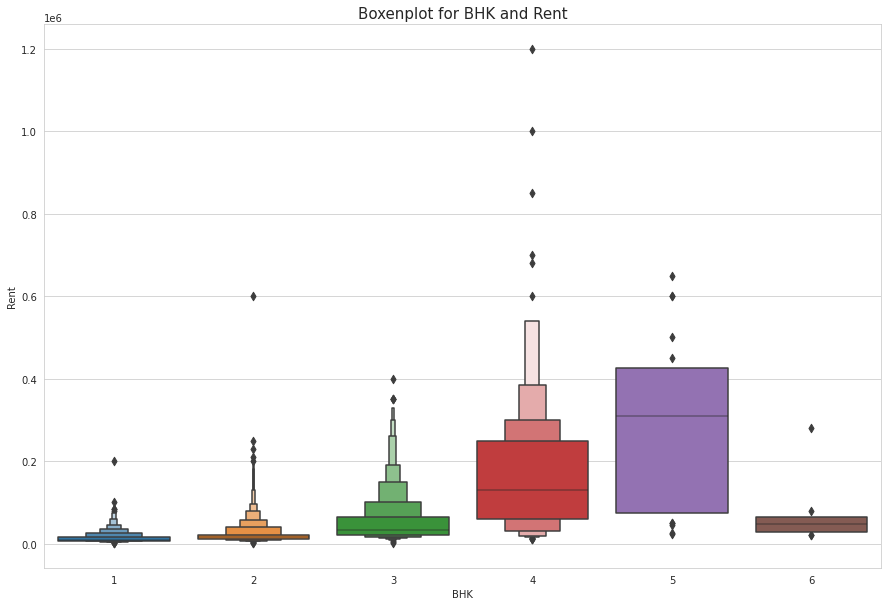

In [23]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=rent_data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

#### Obseervations:
- The rent of the houses is subsequently increasing with increase in BHK.
- For 6 BHK, things doesn't seem feasible and they are less in demand so rent is very less.

### Bathroom and Rent distribution

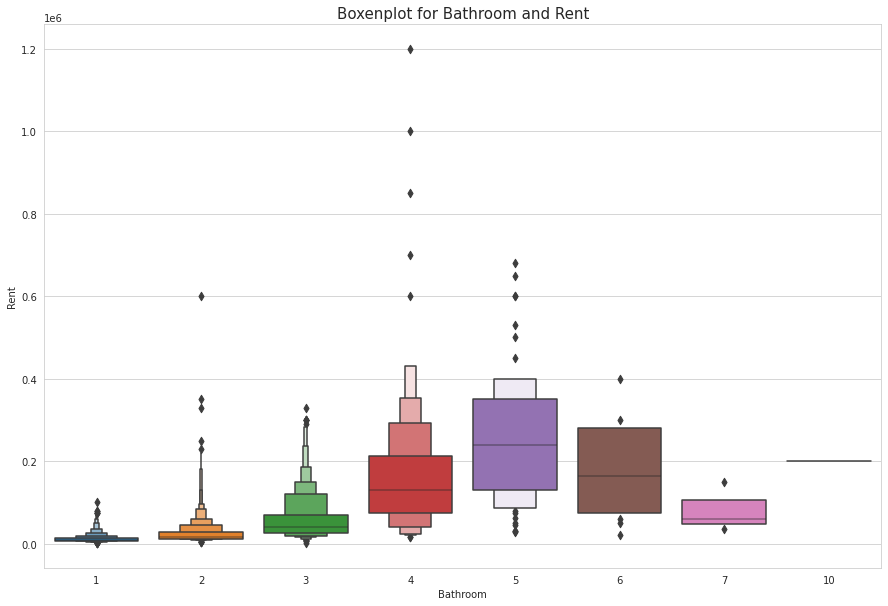

In [24]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=rent_data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

#### Observations:
- The House rent is increasing with increase in bathrooms in house.
- But having more than 4-5 bathrooms in a house doesn't seem good or feasible, so they are less in demand and that's why there rent is less.

### Area Type and Rent Distribution

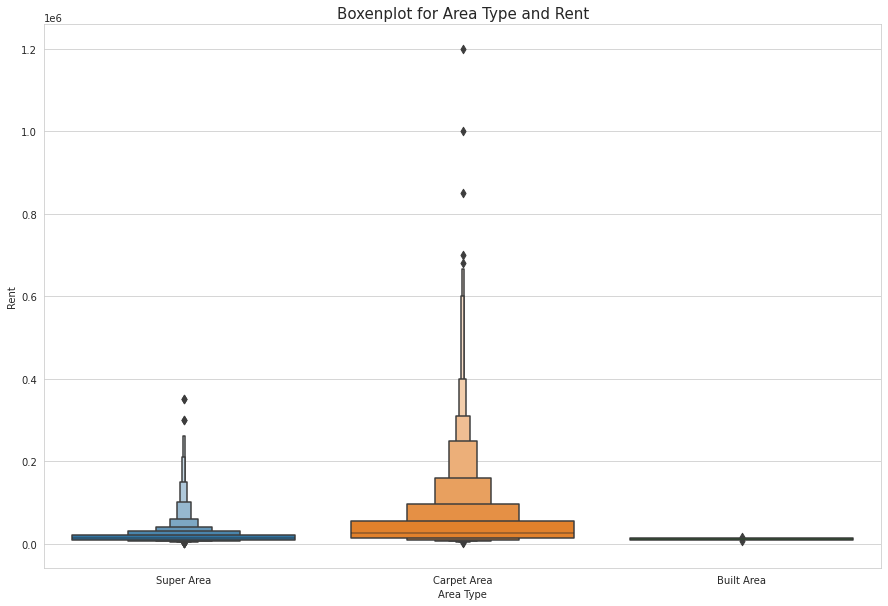

In [25]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=rent_data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses with Carpet Area have more rent as compared to Super Area.
- Built Area are less in demand , so rent is kept less.

### City and Rent Distribution

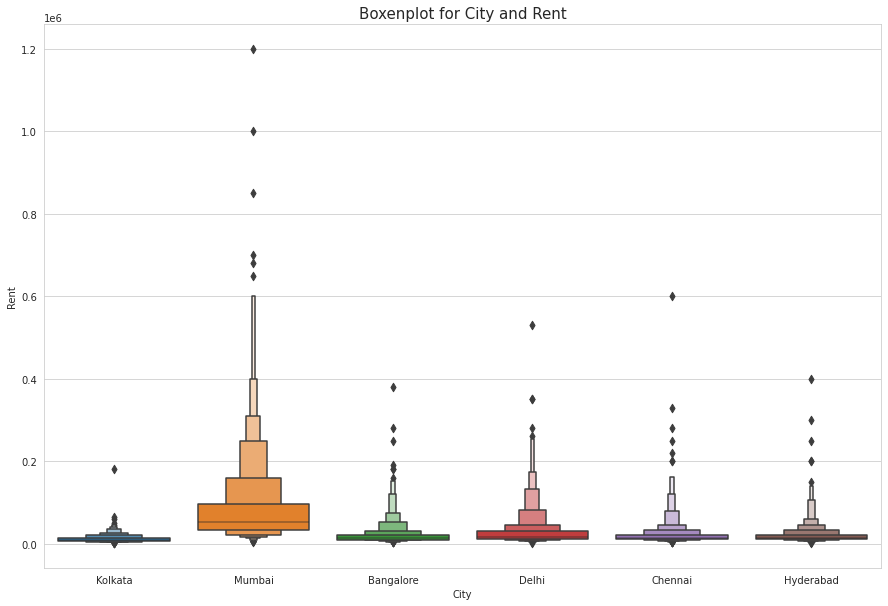

In [26]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y='Rent',data=rent_data)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

#### Observations:
- Seems Mumbai is having too much demand for houses, so rent is also very high. The immigrations of job corporates to Mumbai is high. This could be one of the reason of more demand in rented houses.
- All other cities except Kolkata are having fair equal amount of rent. 
- Kolkata is not very much flourised in terms of job sectors and lifestyle as compared to other cities. Moreover it is also less developed compared to them. So demand is less there, so rent is also less.

### Furnishing Status and Rent Distribution

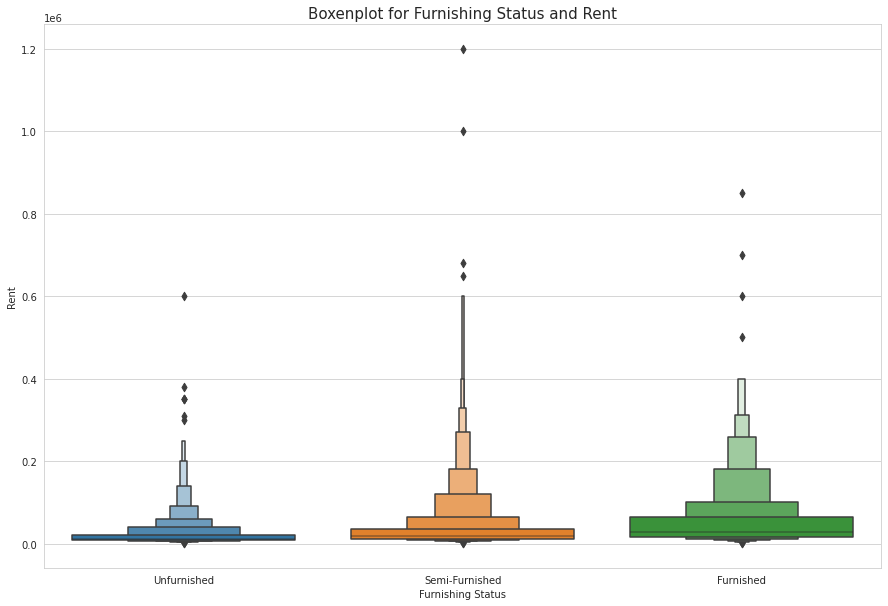

In [27]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=rent_data)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

#### Observations:
- Unfurnished houses for rent are having less rent as compared to others.

### Tenant Preferred and Rent Distribution

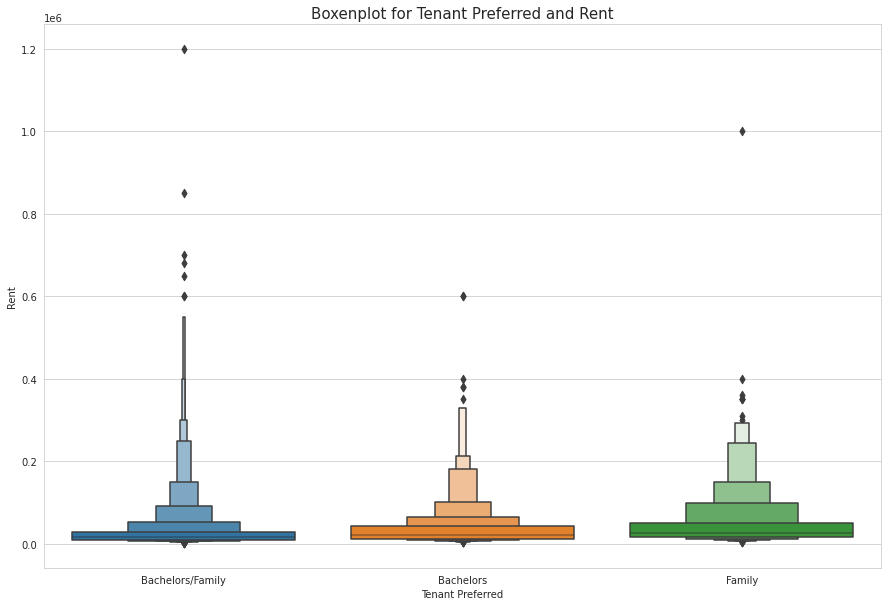

In [28]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=rent_data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses rented with no tenant conditions are having a bit more rent as compared to others.

### Point of Contact and Rent Distribution

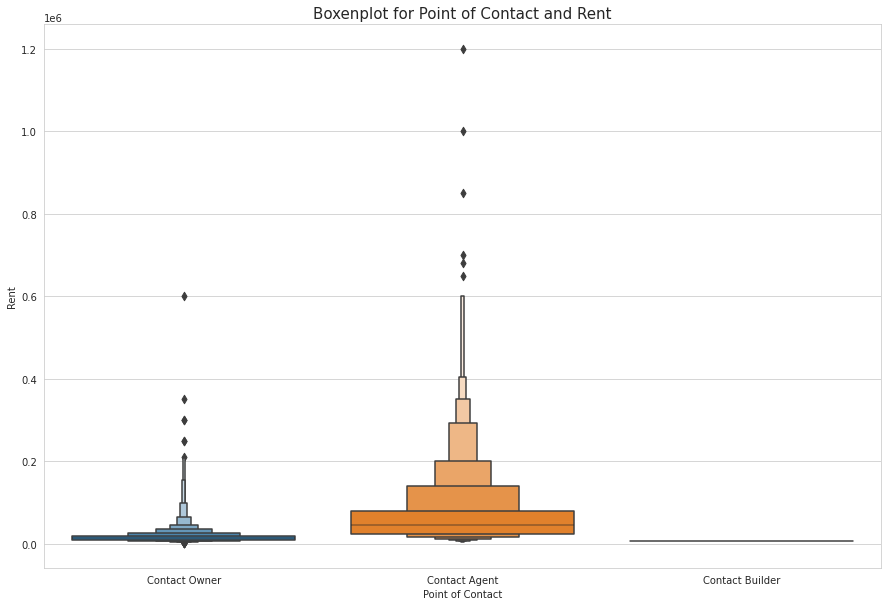

In [29]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=rent_data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

#### Observations:
- As having a contact agent to get you a house rented also involves paying him/her. So this could be one of the reason that rent for Contact Agent pount of contact is bit high to compensate that.
- Directly contacting Builder involves less rent.

### Sunburst Chart

In [30]:
fig = px.sunburst(rent_data, path=['City','Area Type', 'Furnishing Status', 'Tenant Preferred'], width=900,
    height=900,title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

<div class="alert alert-block alert-info"> 📌 Hover over various sections of chart, and click on it to get more clear insights.</div>

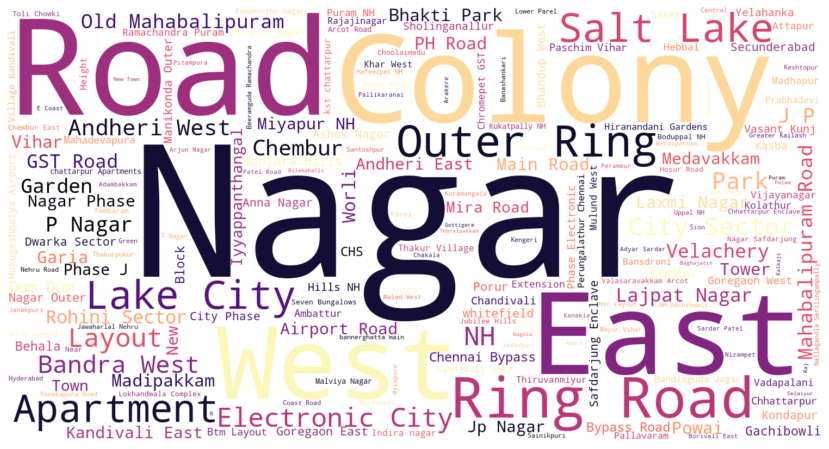

In [31]:
text = " ".join(area for area in rent_data["Area Locality"])
wordcloud = WordCloud(background_color="white", 
                      max_words=200,
                      width=1500, 
                      height=800,
                      colormap="magma" ).generate(text)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Heatmap of Correlation

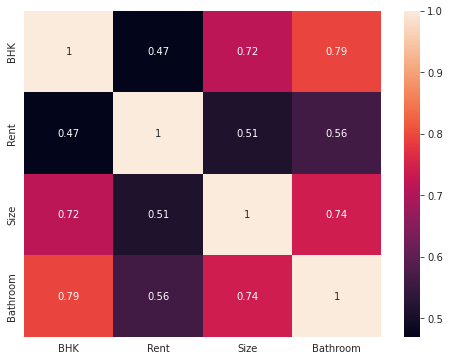

In [32]:
corr = rent_data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

In [33]:
##Dropping unnecesaary columns from dataset
rent_data = rent_data.drop(['Posted On','Area Locality','Floor'],axis=1)
rent_data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [34]:
rent_data = pd.get_dummies(rent_data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


# Modeling

In [35]:
X = rent_data.drop('Rent',axis=1)
y = rent_data['Rent']

## Splitting into Train and Test dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

## Scaling the data

In [37]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [38]:
print(X_train,y_train)

[[-1.29973557 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292  0.36670492  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 ...
 [-0.10471292 -0.18307009  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.96846295 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.81138438  0.04443349 ...  1.45846448 -0.01735525
  -1.45745561]] [[-0.42245895]
 [-0.39738427]
 [-0.3388767 ]
 ...
 [-0.1717122 ]
 [-0.4726083 ]
 [-0.15499575]]


## Linear Regression

The most extensively used modelling technique is linear regression, which assumes a linear connection between a dependent variable (Y) and an independent variable (X). It employs a regression line, also known as a best-fit line. The linear connection is defined as Y = c+m*X + e, where ‘c’ denotes the intercept, ‘m’ denotes the slope of the line, and ‘e’ is the error term.

The linear regression model can be simple (with only one dependent and one independent variable) or complex (with numerous dependent and independent variables) (with one dependent variable and more than one independent variable).

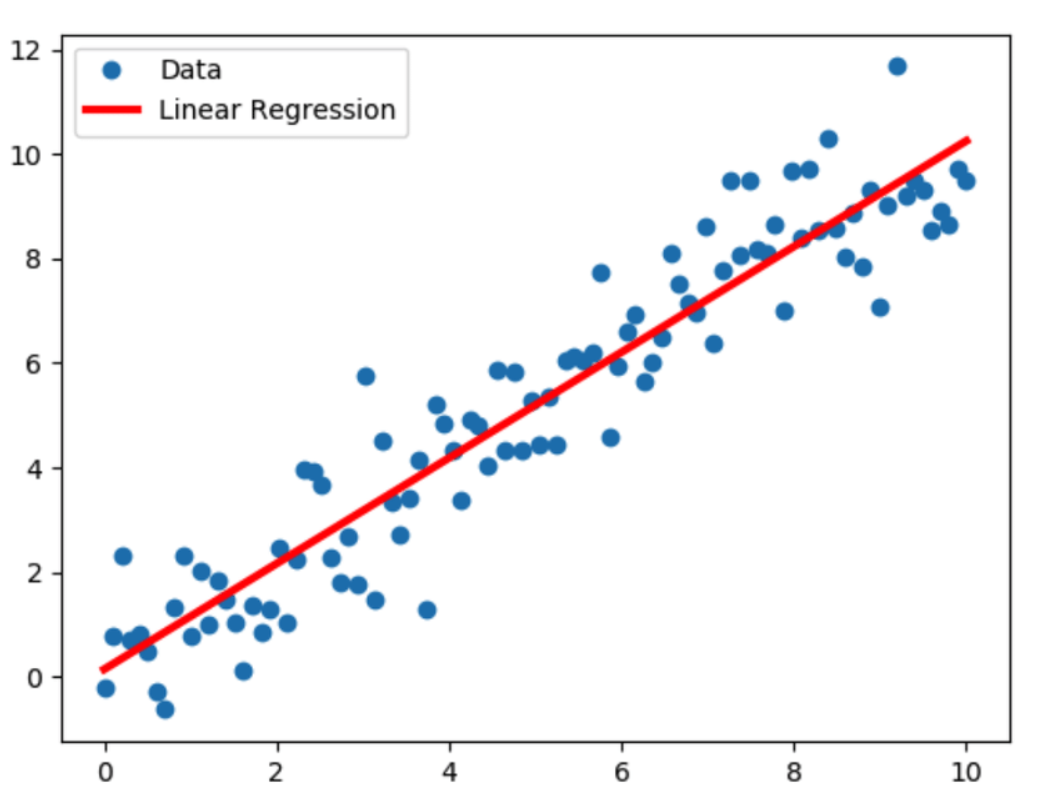

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [40]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 5468443462.803723
MSE: 5.364877113932917e+19
RMSE: 7324532144.739975


## Decision Tree

Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application.

It is a tree-structured classifier with three types of nodes. The Root Node is the initial node which represents the entire sample and may get split further into further nodes. The Interior Nodes represent the features of a data set and the branches represent the decision rules. Finally, the Leaf Nodes represent the outcome. This algorithm is very useful for solving decision-related problems.

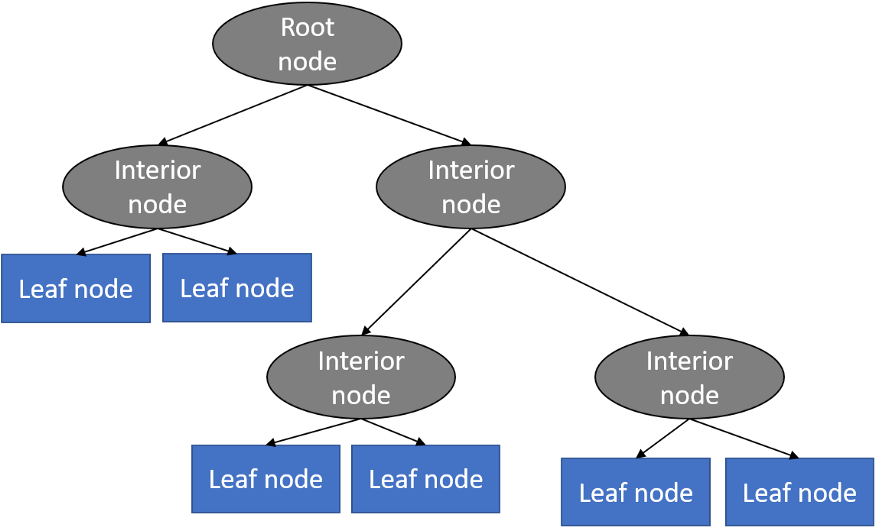


In [41]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [42]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.25767891524169967
MSE: 0.4224998679675354
RMSE: 0.6499998984365578


## Support Vector Regressor
Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.

The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample. So let’s now dive deep and understand how SVR works actually.

Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

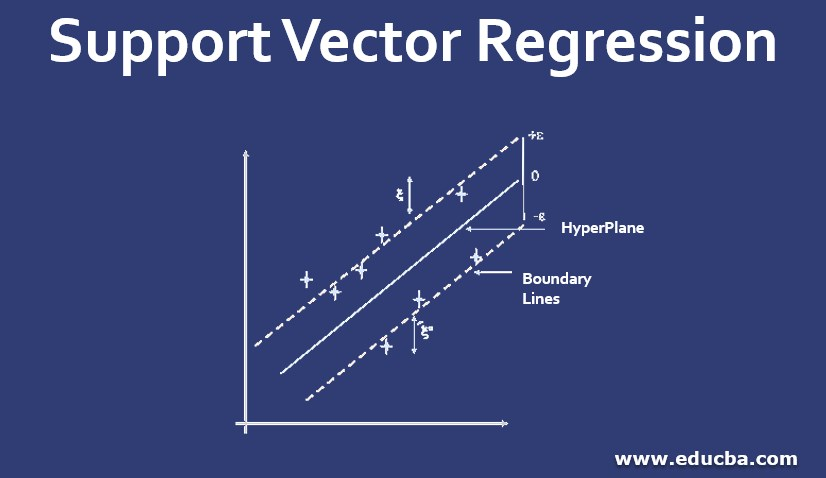

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

In [43]:
svr = SVR()
svr.fit(X_train, y_train) 
svr_prediction = svr.predict(X_test)

# Evaluation metrics
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
mse_svr =  metrics.mean_squared_error(y_test, svr_prediction)
rmse_svr =  np.sqrt(mse_svr)

In [44]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

MAE: 0.19318449711918328
MSE: 0.35531971011457375
RMSE: 0.5960869987800218


## Random Forest

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

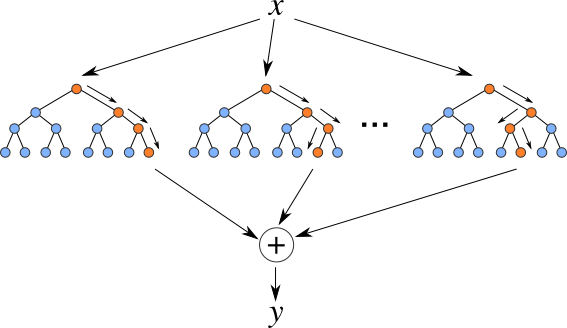

In [45]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [46]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.2085165071623965
MSE: 0.3026413085279006
RMSE: 0.5501284472992654


In [47]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

# Evaluation metrics
mae_clf = metrics.mean_absolute_error(y_test, clf_prediction)
mse_clf =  metrics.mean_squared_error(y_test, clf_prediction)
rmse_clf =  np.sqrt(mse_clf)

In [48]:
print('MAE:', mae_clf)
print('MSE:', mse_clf)
print('RMSE:', rmse_clf)

MAE: 0.32968860404858025
MSE: 0.522145413635148
RMSE: 0.7225963005960853


### <p style="text-align:center;"><span style="color:red">💬 Thanks for reading till the end!! If you liked the notebook till here then please do Upvote👍, and all ears to advice/remarks if you think anything needs to be added/modified.</span></p>